# Imports & Parsing

In [265]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime
import requests
from bs4 import BeautifulSoup


In [266]:
link = 'http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html'
page = requests.get(link).content
page = BeautifulSoup(page, 'html.parser')

for i in page(['style', 'script']):
        # Remove tags
        i.decompose()

In [267]:
text = ' '.join(page.stripped_strings).replace('Wind/WAVES type II bursts and CMEs A Brief Description NOTE: List includes DH type II bursts observed by Wind spacecraft, \nbut after STEREO launch on Oct 2006 the start and end times and \nfrequencies of bursts are determined using both Wind and STEREO \nobservations\n\n=================================================================================================\n                DH Type II                       Flare                     CME                   \n----------------------------------------   -----------------   --------------------------   Plots\nStart            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        \n(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) \n=================================================================================================\n', '')

In [268]:
text = text.split('PHTX')[:-1]

In [269]:
new_text = [i.split('\n') for i in text]

new_col = []

for i in range(len(new_text) + 1):
    if i == len(new_text):
        new_col.append('NaN')
        break

    if i == 0:
        new_text[i] = new_text[i][0]
        continue

    if len(new_text[i]) > 1:
        new_col.append(new_text[i][0])
        new_text[i] = new_text[i][1]

    else:
        new_col.append('NaN')
        new_text[i] = new_text[i][0]

In [270]:
new_text[0]

'1997/04/01 14:00 04/01 14:15 8000 4000 S25E16  8026 M1.3 04/01 15:18   74   79 312 '

In [271]:
parsed_text = [i.split(' ') for i in new_text]

In [272]:
for i in range(len(parsed_text)):
    parsed_text[i] = [j for j in parsed_text[i] if j]

In [273]:
text = np.array(parsed_text, dtype=list)
text[0]

array(['1997/04/01', '14:00', '04/01', '14:15', '8000', '4000', 'S25E16',
       '8026', 'M1.3', '04/01', '15:18', '74', '79', '312'], dtype=object)

In [274]:
#saving parsed text to a txt file
f = open("parsed_data.txt", "w")

f.write('\n'.join(' '.join(row) for row in text))

f.close()

# Creating the dataframe

In [275]:
cols = np.arange(0, 14)
cols

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [276]:
data = pd.read_csv("parsed_data.txt", delim_whitespace = True, header = None, usecols=cols)

In [277]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014/12/13,14:27,12/13,14:51,14000,3900,W90b,-----,----,12/13,14:24,Halo,360,2222
478,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,108,869
479,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,Halo,360,587
480,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,Halo,360,1195


In [278]:
names = ['start_date', 'start_time', 'end_date', 'end_time', 
            'start_frequency', 'end_frequency', 'flare_location', 'flare_region',
            'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed']

names = dict(zip(cols, names))

In [279]:
data.rename(columns=names, inplace=True)

### Adding the final column

In [280]:
data["Row description"] = new_col
data["Row description"] = data["Row description"].apply(lambda x: 'NaN' if x in [' ------', 'NaN'] else ' '.join(x.split(' ')[1:]))
data.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,Row description
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,NaN
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,NaN
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,NaN
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,NaN
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,NaN


# NaNs & Duplicates Check

In [281]:
data.isin(["NaN"]).sum()

start_date                0
start_time                0
end_date                  0
end_time                  0
start_frequency           0
end_frequency             0
flare_location            0
flare_region              0
flare_classification      0
cme_date                  0
cme_time                  0
cme_angle                 0
cme_width                 0
cme_speed                 0
Row description         444
dtype: int64

In [282]:
data.isna().sum()

start_date              0
start_time              0
end_date                0
end_time                0
start_frequency         0
end_frequency           0
flare_location          0
flare_region            0
flare_classification    0
cme_date                0
cme_time                0
cme_angle               0
cme_width               0
cme_speed               0
Row description         0
dtype: int64

In [283]:
data.duplicated().sum()

0

#  1) Recode any missing entries as NaN

In [284]:
#missing frequencies
data.isin(['????']).sum()

start_date              0
start_time              0
end_date                0
end_time                0
start_frequency         6
end_frequency           6
flare_location          0
flare_region            0
flare_classification    0
cme_date                0
cme_time                0
cme_angle               0
cme_width               0
cme_speed               0
Row description         0
dtype: int64

In [285]:
data[['start_frequency', 'end_frequency']] = data[['start_frequency', 'end_frequency']].apply(
                        lambda x: [i.replace('????', 'NaN') for i in x])
data[['start_frequency', 'end_frequency']].isin(['????']).sum()

start_frequency    0
end_frequency      0
dtype: int64

In [286]:
#missing locations
data['flare_location'].isin(['Back', 'BACK', '------', 'Back?']).sum()

32

In [287]:
data['flare_location'] = data['flare_location'].apply(lambda x: "NaN" if x in ['Back', 'BACK', '------', 'Back?'] else x)
data['flare_location'].isin(['BACK', '------']).sum()

0

In [288]:
#missing active regions
data['flare_region'].isin(['-----', "------"]).sum()

83

In [289]:
data['flare_region'] = data['flare_region'].apply(lambda x: "NaN" if x in ['-----', "------"] else x)
data['flare_region'].isin(['-----', '------']).sum()

0

In [290]:
#missing X-Ray Importance
data['flare_classification'].isin(['----']).sum()

105

In [291]:
data['flare_classification'] = data['flare_classification'].apply(lambda x: x.replace('----', 'NaN'))
data['flare_classification'].isin(['----']).sum()

0

In [292]:
#missing CMEs
data.iloc[:, 9:14].isin(['----', "--/--", '--:--', '---']).sum()

cme_date     20
cme_time     20
cme_angle    21
cme_width    20
cme_speed    20
dtype: int64

In [293]:
data.iloc[:, 9:14] = data.iloc[:, 9:14].apply(lambda x: ['NaN' if i in ['----', "--/--", '--:--', '---'] 
                                                                                else i for i in x])
data.iloc[:, 9:14].isin(['----', "--/--", '--:--', '---']).sum()

cme_date     0
cme_time     0
cme_angle    0
cme_width    0
cme_speed    0
dtype: int64

# 2) Create a new column that indicates if a row corresponds to a halo flare or not

In [294]:
data.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,Row description
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,NaN
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,NaN
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,NaN
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,NaN
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,NaN


In [295]:
data['cme_angle'] == 'Halo'

0      False
1       True
2       True
3      False
4      False
       ...  
477     True
478    False
479     True
480     True
481     True
Name: cme_angle, Length: 482, dtype: bool

In [296]:
data.insert(12, 'CPA_Is_Halo', data['cme_angle'] == 'Halo')

In [297]:
data.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,CPA_Is_Halo,cme_width,cme_speed,Row description
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79,312,NaN
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,True,360,878,NaN
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,True,360,464,NaN
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,False,165,296,NaN
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,False,155,712,NaN


In [298]:
data['cme_angle'] = data['cme_angle'].apply(lambda x: x.replace('Halo', 'NA'))
data

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,CPA_Is_Halo,cme_width,cme_speed,Row description
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79,312,NaN
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,True,360,878,NaN
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,True,360,464,NaN
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,False,165,296,NaN
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,False,155,712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014/12/13,14:27,12/13,14:51,14000,3900,W90b,NaN,NaN,12/13,14:24,NA,True,360,2222,NaN
478,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,False,108,869,NaN
479,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,NA,True,360,587,NaN
480,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,NA,True,360,1195,"LASCO_DG, reverse drifts, interaction?, CME la..."


# 3) Create a new column that indicates if width is given as a lower bound

In [299]:
new_col = [">" in i for i in data['cme_width'].values]
data.insert(14,'Width_IS_lower_bound', new_col)
data.head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,CPA_Is_Halo,cme_width,Width_IS_lower_bound,cme_speed,Row description
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79,False,312,NaN
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,True,360,False,878,NaN
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,True,360,False,464,NaN
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,False,165,False,296,NaN
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,False,155,False,712,NaN


In [300]:
data['cme_width'] = data['cme_width'].apply(lambda x: re.sub(r"[>h]", "", x)).values

In [301]:
data

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,CPA_Is_Halo,cme_width,Width_IS_lower_bound,cme_speed,Row description
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79,False,312,NaN
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,True,360,False,878,NaN
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,True,360,False,464,NaN
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,False,165,False,296,NaN
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,False,155,False,712,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014/12/13,14:27,12/13,14:51,14000,3900,W90b,NaN,NaN,12/13,14:24,NA,True,360,False,2222,NaN
478,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,False,108,False,869,NaN
479,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,NA,True,360,False,587,NaN
480,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,NA,True,360,False,1195,"LASCO_DG, reverse drifts, interaction?, CME la..."


# 4) Combine date and time columns for start, end and cme

In [302]:
#encoding start dates
start_date = data['start_date'].apply(lambda x: np.array(x.split('/')).astype(int)).values
start_time = data['start_time'].apply(lambda x: np.array(x.split(':')).astype(int)).values

start_datetime = [] 
for i in range (len(start_time)):
    start_datetime.append(datetime.datetime(start_date[i][0], start_date[i][1], start_date[i][2],
                        start_time[i][0], start_time[i][1]))

print(start_datetime[0])

1997-04-01 14:00:00


In [303]:
data.drop(columns=['start_date', 'start_time'], inplace=True)
data.insert(0, 'starting_Datetime', start_datetime)
data.head()

,starting_Datetime,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,CPA_Is_Halo,cme_width,Width_IS_lower_bound,cme_speed,Row description
0,1997-04-01 14:00:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79,False,312,NaN
1,1997-04-07 14:30:00,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,True,360,False,878,NaN
2,1997-05-12 05:15:00,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,True,360,False,464,NaN
3,1997-05-21 20:20:00,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,False,165,False,296,NaN
4,1997-09-23 21:53:00,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,False,155,False,712,NaN


In [304]:
#encoding end dates
end_date = data['end_date'].apply(lambda x: np.array(x.split('/')).astype(int)).values
end_time = data['end_time'].apply(lambda x: np.array(x.split(':')).astype(int)).values

end_datetime = [] 
for i in range (len(end_time)):
    end_datetime.append(datetime.datetime(start_date[i][0], end_date[i][0], end_date[i][1],
                        end_time[i][0] % 24, end_time[i][1]))

print(end_datetime[0])

1997-04-01 14:15:00


In [305]:
data.drop(columns=['end_date', 'end_time'], inplace=True)
data.insert(1, 'ending_Datetime', start_datetime)
data.head()

,starting_Datetime,ending_Datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,CPA_Is_Halo,cme_width,Width_IS_lower_bound,cme_speed,Row description
0,1997-04-01 14:00:00,1997-04-01 14:00:00,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,False,79,False,312,NaN
1,1997-04-07 14:30:00,1997-04-07 14:30:00,11000,1000,S28E19,8027,C6.8,04/07,14:27,NA,True,360,False,878,NaN
2,1997-05-12 05:15:00,1997-05-12 05:15:00,12000,80,N21W08,8038,C1.3,05/12,05:30,NA,True,360,False,464,NaN
3,1997-05-21 20:20:00,1997-05-21 20:20:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,False,165,False,296,NaN
4,1997-09-23 21:53:00,1997-09-23 21:53:00,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,False,155,False,712,NaN


In [306]:
#encoding CME
cme_date = data['cme_date'].apply(lambda x: np.array(x.split('/')).astype(int) if x != "NaN" else x).values
cme_time = data['cme_time'].apply(lambda x: np.array(x.split(':')).astype(int) if x != "NaN" else x).values

cme_datetime = [] 
for i in range (len(cme_time)):
    if not 'NaN' in cme_date[i]:
        cme_datetime.append(datetime.datetime(start_date[i][0], cme_date[i][0], cme_date[i][1],
                        cme_time[i][0] % 24, cme_time[i][1]))

    else:
        cme_datetime.append('NaN')

print(cme_datetime[0])

1997-04-01 15:18:00


<ipython-input-306-2ca13658587d>:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if not 'NaN' in cme_date[i]:


In [307]:
data.drop(columns=['cme_date', 'cme_time'], inplace=True)
data.insert(7, 'cme_Datetime', cme_datetime)
data.head()

,starting_Datetime,ending_Datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_Datetime,cme_angle,CPA_Is_Halo,cme_width,Width_IS_lower_bound,cme_speed,Row description
0,1997-04-01 14:00:00,1997-04-01 14:00:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,False,79,False,312,NaN
1,1997-04-07 14:30:00,1997-04-07 14:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,True,360,False,878,NaN
2,1997-05-12 05:15:00,1997-05-12 05:15:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,True,360,False,464,NaN
3,1997-05-21 20:20:00,1997-05-21 20:20:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,False,165,False,296,NaN
4,1997-09-23 21:53:00,1997-09-23 21:53:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,False,155,False,712,NaN


# 5) Visualizations

In [308]:
data.to_csv('output.csv')

## Question 1) What were the problems that faced the data collection ? (row_description column)

In [309]:
row_description = data[data['Row description'] != 'NaN']

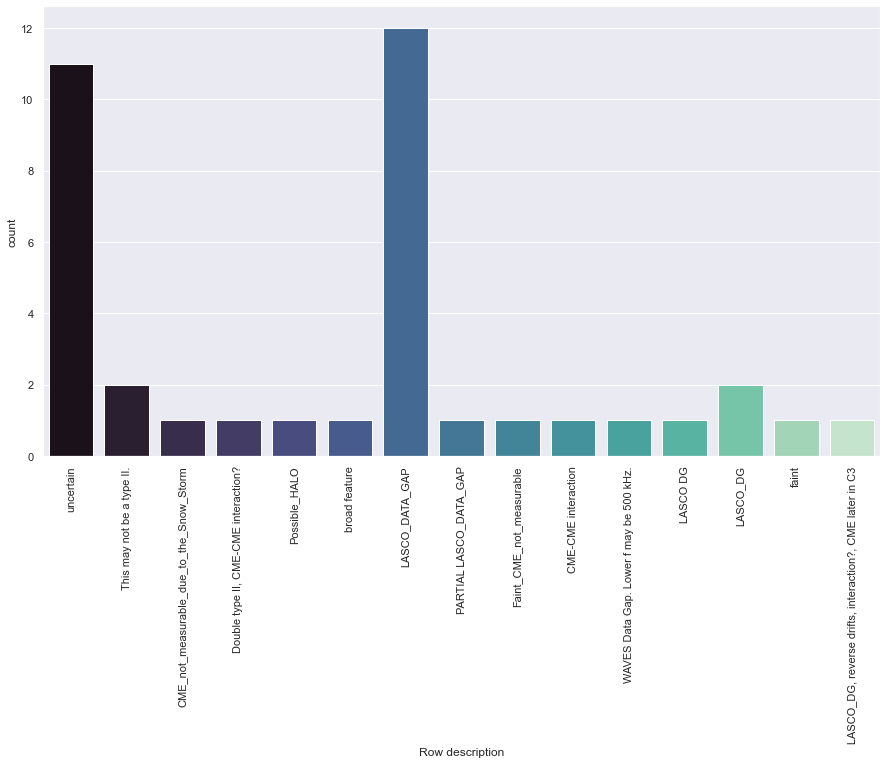

In [310]:
sns.set(rc={'figure.figsize':(15,8.27)})
ax = sns.countplot(x='Row description', data = row_description, palette="mako")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_=0

### The most frequent problems were Lasco data gap (Lack of SOHO observations) and uncertain conditions

## Question 2) Are there outliers in the Frequenies ?

In [311]:
freq = data[data[['start_frequency', 'end_frequency']] != 'NaN'][['start_frequency', 'end_frequency']]
freq = freq.apply(pd.to_numeric)
freq

,start_frequency,end_frequency
0,8000.0,4000.0
1,11000.0,1000.0
2,12000.0,80.0
3,5000.0,500.0
4,6000.0,2000.0
...,...,...
477,14000.0,3900.0
478,2900.0,2100.0
479,14000.0,11500.0
480,5100.0,1300.0


<AxesSubplot:>

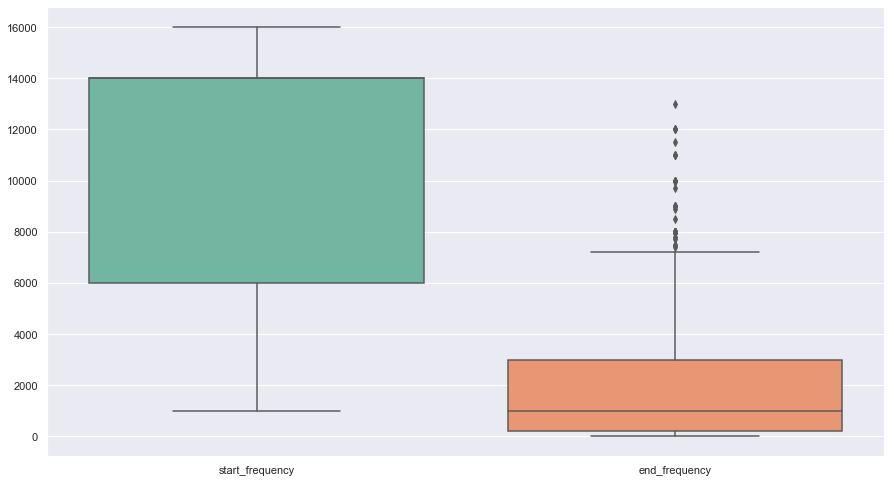

In [312]:
sns.boxplot(data=freq, orient="v", palette="Set2")

### There seems to be no outliers in the start frequency, but there are multiples of them in the end frequency

## Question 3) How much are the numerical columns correlated ?

In [313]:
cme = data[['start_frequency', 'end_frequency', 'cme_angle', 'cme_width', 'cme_speed']]
cme = cme[(cme != 'NaN') & (cme != 'NA')]
cme = cme.apply(pd.to_numeric).dropna()
cme

,start_frequency,end_frequency,cme_angle,cme_width,cme_speed
0,8000.0,4000.0,74.0,79.0,312.0
3,5000.0,500.0,263.0,165.0,296.0
4,6000.0,2000.0,133.0,155.0,712.0
5,14000.0,250.0,240.0,109.0,227.0
6,14000.0,5000.0,233.0,122.0,352.0
...,...,...,...,...,...
473,3300.0,1900.0,264.0,159.0,513.0
474,2500.0,1500.0,309.0,210.0,782.0
475,14000.0,8900.0,152.0,142.0,260.0
476,14000.0,7800.0,305.0,141.0,426.0


<AxesSubplot:>

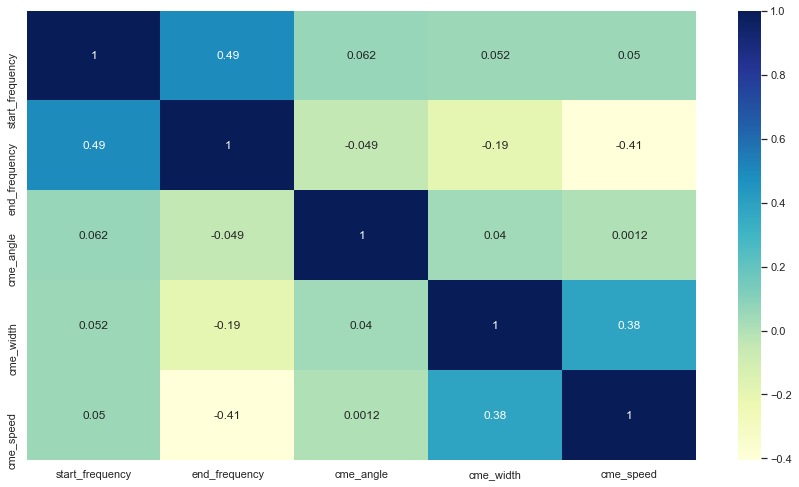

In [314]:
sns.heatmap(cme.corr(), cmap="YlGnBu", annot=True)

- ### The start & End frequencies have the highest correlation followed by CME width & speed
- ### while the other columns are not correlated at all
- ### CME columns are inversely correleted with the frequency columns